# Assignment: Hypothesis Testing Concepts
# Student: Rizky Febri Ibra Habibie
# Bootcamp: Data Science dan Data Analyst
# Day 10

## 1. Eksplorasi dan Statistik Deskriptif

In [80]:
pip install pingouin

In [81]:
#import libraries
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ttest_ind

In [82]:
#import file
file_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dibimbing/Assignment Day 10 - Hypothesis Testing Concepts/marketing_campaign.csv')

In [83]:
file_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [84]:
# Cek file
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [85]:
file_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [86]:
# Cek missing value
print("Missing Values per Column:\n", file_df.isnull().sum())

Missing Values per Column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


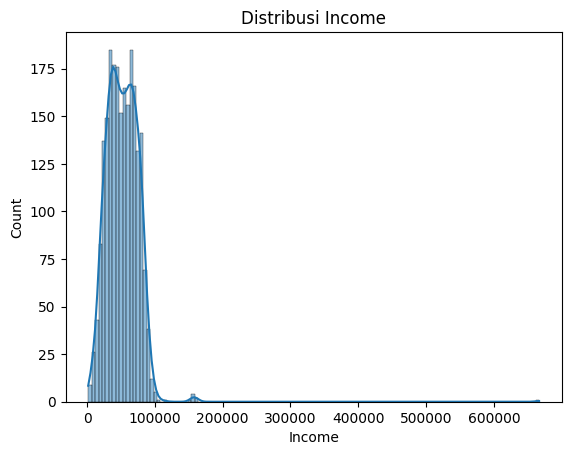

In [87]:
# Cek bentuk plot dari income
sns.histplot(file_df['Income'], kde=True)
plt.title('Distribusi Income')
plt.show()

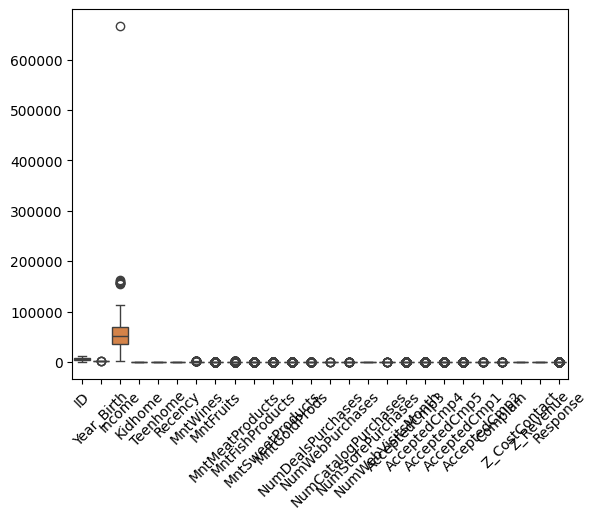

In [88]:
# Cek outlier
sns.boxplot(data=file_df)
plt.xticks(rotation=45)
plt.show()
# Outlier pada Income

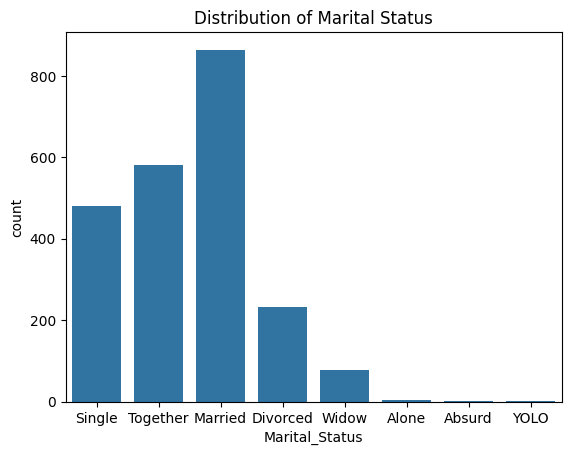

In [89]:
sns.countplot(x='Marital_Status', data=file_df)
plt.title('Distribution of Marital Status')
plt.show()

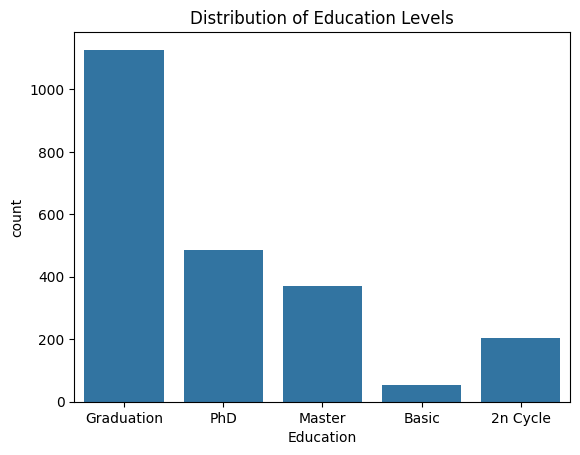

In [90]:
sns.countplot(x='Education', data=file_df)
plt.title('Distribution of Education Levels')
plt.show()

## 2. Uji Hipotesis

- Pertanyaan Hipotesis:

Apakah terdapat perbedaan rata-rata Income antar tingkat Education?

- Definisi Hipotesis:

  - H0: Tidak ada perbedaan rata-rata Income antar tingkat pendidikan.
  - H1: Ada perbedaan rata-rata Income antar tingkat pendidikan.

### Anova Test

In [91]:
file_df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [92]:
# Menghapus missing value
anova_data = file_df[['Education', 'Income']].dropna()
anova_data

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0
...,...,...
2235,Graduation,61223.0
2236,PhD,64014.0
2237,Graduation,56981.0
2238,Master,69245.0


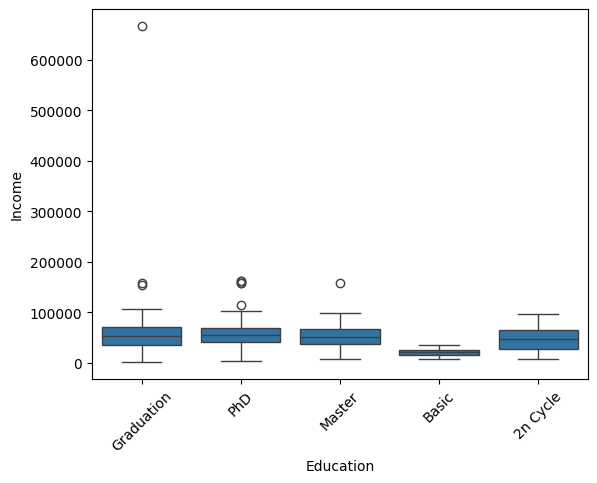

In [93]:
# Cek Outlier
sns.boxplot(x='Education',y='Income',data=anova_data)
plt.xticks(rotation=45)
plt.show()

In [94]:
#Menghapus Outlier
Q1 = anova_data['Income'].quantile(0.25)
Q3 = anova_data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outlier1 = anova_data[(anova_data['Income'] >= lower_bound) & (anova_data['Income'] <= upper_bound)]

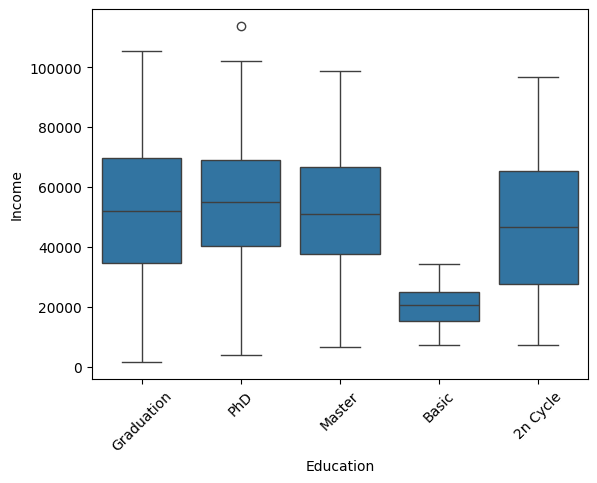

In [95]:
# Cek data baru
sns.boxplot(x='Education',y='Income',data=df_no_outlier1)
plt.xticks(rotation=45)
plt.show()

In [96]:
anova_res = pg.anova(dv="Income", between="Education", data=df_no_outlier1, detailed=True)
anova_res.loc[:, ["Source", "SS", "DF", "MS", "F", "p-unc"]]

,Source,SS,DF,MS,F,p-unc
0,Education,6.303620e+10,4,1.575905e+10,39.278884,8.234400e-32
1,Within,8.838638e+11,2203,4.012092e+08,NaN,NaN


In [97]:
alpha = 0.05
if anova_res['p-unc'].iloc[0] < alpha:
    print("\nP-value < 0.05: Tolak H0. Terdapat perbedaan signifikan pada rata-rata Income antar tingkat pendidikan.")
else:
    print("\nP-value >= 0.05: Gagal menolak H0. Tidak terdapat perbedaan signifikan pada rata-rata Income antar tingkat pendidikan.")


P-value < 0.05: Tolak H0. Terdapat perbedaan signifikan pada rata-rata Income antar tingkat pendidikan.


### T-Test

Karena Education memiliki lebih dari 2 kategori, maka kita menggunakan **Response** sebagai variabel yang diuji dengan **Income**

In [98]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [99]:
# Hapus missing Income
ttest_data = file_df[['Response', 'Income']].dropna()

In [100]:
ttest_data

,Response,Income
0,1,58138.0
1,0,46344.0
2,0,71613.0
3,0,26646.0
4,0,58293.0
...,...,...
2235,0,61223.0
2236,0,64014.0
2237,0,56981.0
2238,0,69245.0


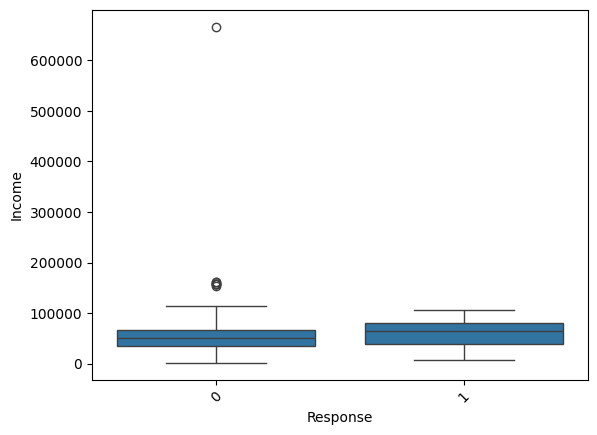

In [101]:
# Cek Outlier
sns.boxplot(x='Response',y='Income',data=ttest_data)
plt.xticks(rotation=45)
plt.show()

In [102]:
# Menghapus Outlier
Q1 = ttest_data['Income'].quantile(0.25)
Q3 = ttest_data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outlier = ttest_data[(ttest_data['Income'] >= lower_bound) & (ttest_data['Income'] <= upper_bound)]

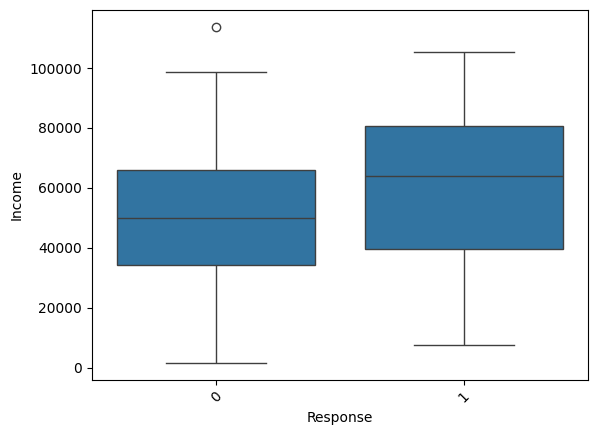

In [103]:
# Cek data baru
sns.boxplot(x='Response',y='Income',data=df_no_outlier)
plt.xticks(rotation=45)
plt.show()

In [104]:
# Pisahkan grup berdasarkan Response
income_response_0 = df_no_outlier[df_no_outlier['Response'] == 0]['Income']
income_response_1 = df_no_outlier[df_no_outlier['Response'] == 1]['Income']

In [105]:
income_response_0.head()

,Income
1,46344.0
2,71613.0
3,26646.0
4,58293.0
5,62513.0


In [106]:
income_response_1.head()

,Income
0,58138.0
8,30351.0
15,82800.0
33,46610.0
39,48948.0


In [107]:
# Menghitung T-test
t_stat, p_val = stats.ttest_ind(income_response_0, income_response_1)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -8.324827009686215
P-value: 1.4616064720341788e-16


In [108]:
alpha = 0.05
if p_val < alpha:
    print("\nP-value < 0.05: Tolak H0. Terdapat perbedaan signifikan pada rata-rata Income dengan Response customer accepting last campaign")
else:
    print("\nP-value >= 0.05: Gagal menolak H0. Tidak terdapat perbedaan signifikan pada rata-rata Income dengan Response customer accepting last campaign.")


P-value < 0.05: Tolak H0. Terdapat perbedaan signifikan pada rata-rata Income dengan Response customer accepting last campaign


##3. Interpretasi dan Kesimpulan

### 1. Analisis dan Interpretasi Hasil Uji Hipotesis

  1. Uji t-test: Income vs Response

  - Hipotesis:
    - H₀: Tidak ada perbedaan rata-rata Income antara pelanggan yang merespons dan yang tidak merespons kampanye.
    - H₁: Ada perbedaan rata-rata Income antara kedua kelompok tersebut.
  - Hasil:
    - Setelah menghapus outlier pada Income, diperoleh p-value < 0.05
    - Maka: Tolak H₀
  - Interpretasi:
    - Terdapat perbedaan signifikan dalam pendapatan rata-rata antara pelanggan yang merespons kampanye dengan yang tidak.

  2. Uji ANOVA: Income vs Education

  - Hipotesis:
    - H₀: Tidak ada perbedaan rata-rata Income antar level Education.
    - H₁: Ada perbedaan rata-rata Income berdasarkan tingkat pendidikan.
  - Hasil:
    - ANOVA menghasilkan F-statistic tinggi dan p-value sangat kecil (< 0.05)
    - Maka: Tolak H₀
  - Interpretasi:
    - Rata-rata pendapatan berbeda signifikan antar kelompok pendidikan seperti "PhD", "Master", "Graduation", dsb.


### 2. Konteks Data dan Dampak terhadap Pengambilan Keputusan

  - Temuan ini menunjukkan bahwa:
    - Pendapatan berpengaruh terhadap efektivitas kampanye (Response)
    - Tingkat pendidikan berkorelasi dengan tingkat pendapatan
  - Strategi:
    - Tim pemasaran dapat:
      - Melakukan segmentasi berdasarkan pendapatan dan pendidikan
      - Menyesuaikan pesan atau channel pemasaran untuk kelompok tertentu
      - Fokus pada kelompok dengan pendapatan dan latar pendidikan yang relevan untuk meningkatkan konversi kampanye

### 3. Kesimpulan Final

  - Hasil uji statistik menunjukkan bahwa baik Response maupun Education memiliki hubungan yang signifikan terhadap Income. Pelanggan yang merespons kampanye memiliki pendapatan yang berbeda secara signifikan dibandingkan yang tidak, dan tingkat pendidikan juga memengaruhi rata-rata pendapatan pelanggan.

  - Oleh karena itu, analisis segmentasi pelanggan berdasarkan pendapatan dan pendidikan dapat menjadi dasar yang kuat dalam menyusun strategi pemasaran yang lebih efektif dan tertarget.